Question 1

In [7]:
import csv
import numpy as np

def CalculateClassMean(X, class_label):
        return np.mean(X[X[:, 2] == class_label][:, :2], axis=0)

def ComputeMeanDiff(X):
    class0_mean = CalculateClassMean(X, 0)
    class1_mean = CalculateClassMean(X, 1)

    return class0_mean - class1_mean


def ComputeSW(X):
    class0_X = X[X[:, 2] == 0][:, :2]
    class1_X = X[X[:, 2] == 1][:, :2]
    SW = np.zeros((2, 2))
    for i in range(class0_X.shape[0]):
        SW += np.outer(class0_X[i] - np.mean(class0_X, axis=0), class0_X[i] - np.mean(class0_X, axis=0))
    for i in range(class1_X.shape[0]):
        SW += np.outer(class1_X[i] - np.mean(class1_X, axis=0), class1_X[i] - np.mean(class1_X, axis=0))
    return SW

def ComputeSB(X):
    class0_mean = CalculateClassMean(X, 0)
    class1_mean = CalculateClassMean(X, 1)
    SB = np.outer(class0_mean - class1_mean, class0_mean - class1_mean)
    return SB

def GetLDAProjectionVector(X):
    SW_inv = np.linalg.inv(ComputeSW(X))
    SB = ComputeSB(X)
    eigenvalues, eigenvectors = np.linalg.eig(np.dot(SW_inv, SB))
    max_eigenvalue_idx = np.argmax(eigenvalues)
    return eigenvectors[:, max_eigenvalue_idx]

def project(x, y, w):
    return np.dot([x, y], w)

X = np.genfromtxt('data.csv', delimiter=',')
print(X)
print(X.shape)

opt = int(input("Input your option (1-5): "))

if opt == 1:
    meanDiff = ComputeMeanDiff(X)
    print(meanDiff)
elif opt == 2:
    SW = ComputeSW(X)
    print(SW)
elif opt == 3:
    SB = ComputeSB(X)
    print(SB)
elif opt == 4:
    w = GetLDAProjectionVector(X)
    print(w)
elif opt == 5:
    x = float(input("Input x dimension of a 2-dimensional point: "))
    y = float(input("Input y dimension of a 2-dimensional point: "))
    w = GetLDAProjectionVector(X)
    print(project(x, y, w))


[[ 1.86189843  2.72296272  0.        ]
 [ 2.23589604 -2.15772062  0.        ]
 [ 1.69281688  0.99589606  0.        ]
 ...
 [ 4.46678886  3.44492577  1.        ]
 [ 5.65897988  4.04334073  1.        ]
 [ 1.98017955  7.15815205  1.        ]]
(2000, 3)
Input your option (1-5): 1
[-2.98555047 -3.02425853]


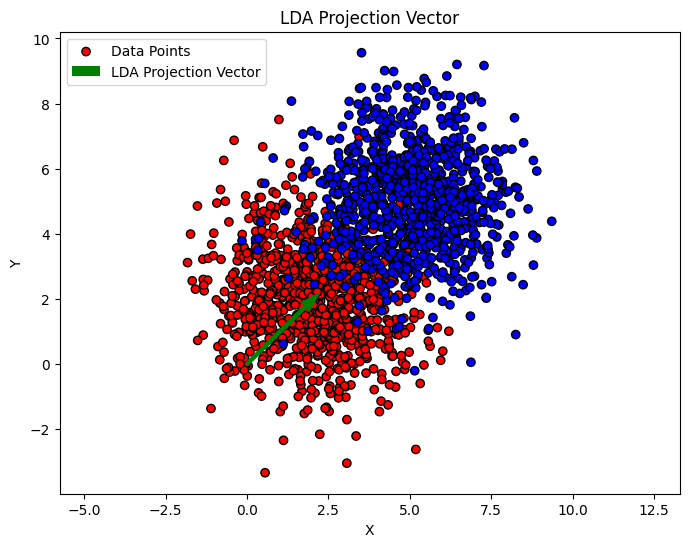

In [8]:
import matplotlib.pyplot as plt

# Plotting the data points in red and blue
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=np.where(X[:, 2]==1, 'blue', 'red'), edgecolors='k', label='Data Points')

# Computing and plotting the LDA projection vector
w = GetLDAProjectionVector(X)
plt.quiver(0, 0, w[0], w[1], scale=6, color='g', label='LDA Projection Vector')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('LDA Projection Vector')
plt.axis('equal')
plt.show()


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # Load the data
# X = np.genfromtxt('data.csv', delimiter=',')
# print(X)
# print(X.shape)

# Split the data into features (X) and labels (y)
X_original = X[:, :2]
y = X[:, 2]

# Compute the LDA projection vector
w = GetLDAProjectionVector(X)

# Project the data using the LDA projection vector
X_projected = np.dot(X_original, w.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.3, random_state=42)
X_train_projected, X_test_projected, _, _ = train_test_split(X_projected, y, test_size=0.3, random_state=42)

# Initialize the 1-NN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier on the original data and make predictions
knn.fit(X_train, y_train)
y_pred_original = knn.predict(X_test)

# Fit the classifier on the projected data and make predictions
knn.fit(X_train_projected, y_train)
y_pred_projected = knn.predict(X_test_projected)

# Compute and print the accuracy scores
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_projected = accuracy_score(y_test, y_pred_projected)

print(f"Accuracy on original data: {accuracy_original}")
print(f"Accuracy on projected data: {accuracy_projected}")


Accuracy on original data: 0.89
Accuracy on projected data: 0.885


Question 2

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
url = "/content/naive_bayes.csv"
df1 = pd.read_csv(url)

# Perform one-hot encoding for categorical features
df = pd.get_dummies(df1, columns=['Outlook', 'Temp', 'Humidity', 'Windy', 'Play'])

# Randomly split the dataset into train and test sets
train_data, test_data = train_test_split(df, test_size=2, random_state=42)

# Display the train and test data
print("Train Data:")
print(train_data)

print("\nTest Data:")
print(test_data)

# Calculate Prior Probabilities
total_samples = len(df)
play_yes_count = len(df[df['Play_yes'] == 1])
play_no_count = len(df[df['Play_no'] == 1])

prior_play_yes = play_yes_count / total_samples
prior_play_no = play_no_count / total_samples

# this include both training and testing data
print(f"\nPrior Probability of playing (P(Play=yes)): {prior_play_yes}")
print(f"Prior Probability of not playing (P(Play=no)): {prior_play_no}")


Train Data:
    Outlook_Overcast  Outlook_Rainy  Outlook_Sunny  Temp_Cool  Temp_Hot  \
0                  0              1              0          0         1   
12                 1              0              0          0         1   
5                  0              0              1          1         0   
8                  0              1              0          1         0   
2                  1              0              0          0         1   
1                  0              1              0          0         1   
13                 0              0              1          0         0   
4                  0              0              1          1         0   
7                  0              1              0          0         0   
10                 0              1              0          0         0   
3                  0              0              1          0         0   
6                  1              0              0          1         0   

    Temp_Mil

In [11]:
def calculate_likelihood_probabilities(train_data):
    play_yes_count = len(train_data[train_data['Play_yes'] == 1])
    play_yes_likelihood = {}
    for col in train_data.columns:
        if 'Play_yes' not in col:
            feature_count = len(train_data[(train_data[col] == 1) & (train_data['Play_yes'] == 1)])
            play_yes_likelihood[col] = feature_count / play_yes_count

    play_no_count = len(train_data[train_data['Play_no'] == 1])
    play_no_likelihood = {}
    for col in train_data.columns:
        if 'Play_no' not in col:
            feature_count = len(train_data[(train_data[col] == 1) & (train_data['Play_no'] == 1)])
            play_no_likelihood[col] = feature_count / play_no_count

    return play_yes_likelihood, play_no_likelihood

def calculate_posterior_probabilities(test_data, play_yes_likelihood, play_no_likelihood):
    prior_play_yes = len(train_data[train_data['Play_yes'] == 1]) / len(train_data)
    prior_play_no = len(train_data[train_data['Play_no'] == 1]) / len(train_data)

    posterior_probabilities = []
    for index, row in test_data.iterrows():
        likelihood_play_yes = prior_play_yes
        likelihood_play_no = prior_play_no
        for col in test_data.columns:
            if 'Play' not in col:
                if row[col] == 1:
                    likelihood_play_yes *= play_yes_likelihood[col]
                    likelihood_play_no *= play_no_likelihood[col]
        total_likelihood = likelihood_play_yes + likelihood_play_no
        # print(total_likelihood)
        posterior_prob_play_yes = likelihood_play_yes / total_likelihood
        posterior_prob_play_no = likelihood_play_no / total_likelihood
        posterior_probabilities.append({'Play_yes': posterior_prob_play_yes, 'Play_no': posterior_prob_play_no})

    return posterior_probabilities

# Task-2: Calculate Likelihood Probabilities
play_yes_likelihood, play_no_likelihood = calculate_likelihood_probabilities(train_data)

# Task-3: Calculate Posterior Probabilities for the testing split
posterior_probabilities = calculate_posterior_probabilities(test_data, play_yes_likelihood, play_no_likelihood)

# Display likelihood probabilities and posterior probabilities
print("\nLikelihood Probabilities (P(feature=value|Play)):")
print("Play = yes:")
for feature, prob in play_yes_likelihood.items():
    print(f"P({feature}=1|Play=yes): {prob}")
print("\nPlay = no:")
for feature, prob in play_no_likelihood.items():
    print(f"P({feature}=1|Play=no): {prob}")

print("\nPosterior Probabilities for Testing Split:")
for i, probs in enumerate(posterior_probabilities):
    print(f"\nSample {i+1}:")
    print(f"P(Play=yes|features): {probs['Play_yes']}")
    print(f"P(Play=no|features): {probs['Play_no']}")


Likelihood Probabilities (P(feature=value|Play)):
Play = yes:
P(Outlook_Overcast=1|Play=yes): 0.42857142857142855
P(Outlook_Rainy=1|Play=yes): 0.2857142857142857
P(Outlook_Sunny=1|Play=yes): 0.2857142857142857
P(Temp_Cool=1|Play=yes): 0.42857142857142855
P(Temp_Hot=1|Play=yes): 0.2857142857142857
P(Temp_Mild=1|Play=yes): 0.2857142857142857
P(Humidity_High=1|Play=yes): 0.2857142857142857
P(Humidity_Normal=1|Play=yes): 0.7142857142857143
P(Windy_f=1|Play=yes): 0.7142857142857143
P(Windy_t=1|Play=yes): 0.2857142857142857
P(Play_no=1|Play=yes): 0.0

Play = no:
P(Outlook_Overcast=1|Play=no): 0.0
P(Outlook_Rainy=1|Play=no): 0.6
P(Outlook_Sunny=1|Play=no): 0.4
P(Temp_Cool=1|Play=no): 0.2
P(Temp_Hot=1|Play=no): 0.4
P(Temp_Mild=1|Play=no): 0.4
P(Humidity_High=1|Play=no): 0.8
P(Humidity_Normal=1|Play=no): 0.2
P(Windy_f=1|Play=no): 0.4
P(Windy_t=1|Play=no): 0.6
P(Play_yes=1|Play=no): 0.0

Posterior Probabilities for Testing Split:

Sample 1:
P(Play=yes|features): 0.8199947520335868
P(Play=no|fea

In [12]:
# Task-4: Make Predictions
predictions = []
for probs in posterior_probabilities:
    if probs['Play_yes'] > probs['Play_no']:
        predictions.append('yes')
    else:
        predictions.append('no')

# Display predictions
print("\nPredictions:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: {pred}")



Predictions:
Sample 1: yes
Sample 2: yes


In [13]:
# Task-5: Use Laplace Smoothing
alpha = 1
print(train_data.columns)
print(len(train_data.columns))
# Calculate likelihood probabilities with Laplace smoothing for Play = yes
play_yes_likelihood_smoothed = {}
for col in train_data.columns:
    if 'Play_yes' not in col:
        feature_count = len(train_data[(train_data[col] == 1) & (train_data['Play_yes'] == 1)]) + alpha
        play_yes_likelihood_smoothed[col] = feature_count / (play_yes_count + alpha * len(train_data.columns) - 1)

# Calculate likelihood probabilities with Laplace smoothing for Play = no
play_no_likelihood_smoothed = {}
for col in train_data.columns:
    if 'Play_no' not in col:
        feature_count = len(train_data[(train_data[col] == 1) & (train_data['Play_no'] == 1)]) + alpha
        play_no_likelihood_smoothed[col] = feature_count / (play_no_count + alpha * len(train_data.columns) - 1)

# Calculate posterior probabilities for the testing split with Laplace smoothing
posterior_probabilities_smoothed = []
for index, row in test_data.iterrows():
    likelihood_play_yes = prior_play_yes
    likelihood_play_no = prior_play_no
    for col in test_data.columns:
        if 'Play' not in col:
            if row[col] == 1:
                likelihood_play_yes *= play_yes_likelihood_smoothed[col]
                likelihood_play_no *= play_no_likelihood_smoothed[col]
    # Normalize probabilities
    total_likelihood = likelihood_play_yes + likelihood_play_no
    posterior_prob_play_yes = likelihood_play_yes / total_likelihood
    posterior_prob_play_no = likelihood_play_no / total_likelihood
    posterior_probabilities_smoothed.append({'Play_yes': posterior_prob_play_yes, 'Play_no': posterior_prob_play_no})

# Display likelihood probabilities with Laplace smoothing
print("\nLikelihood Probabilities with Laplace Smoothing (P(feature=value|Play)):")
print("Play = yes:")
for feature, prob in play_yes_likelihood_smoothed.items():
    print(f"P({feature}=1|Play=yes): {prob}")
print("\nPlay = no:")
for feature, prob in play_no_likelihood_smoothed.items():
    print(f"P({feature}=1|Play=no): {prob}")

# Display posterior probabilities with Laplace smoothing
print("\nPosterior Probabilities for Testing Split with Laplace Smoothing:")
for i, probs in enumerate(posterior_probabilities_smoothed):
    print(f"\nSample {i+1}:")
    print(f"P(Play=yes|features): {probs['Play_yes']}")
    print(f"P(Play=no|features): {probs['Play_no']}")


Index(['Outlook_Overcast', 'Outlook_Rainy', 'Outlook_Sunny', 'Temp_Cool',
       'Temp_Hot', 'Temp_Mild', 'Humidity_High', 'Humidity_Normal', 'Windy_f',
       'Windy_t', 'Play_no', 'Play_yes'],
      dtype='object')
12

Likelihood Probabilities with Laplace Smoothing (P(feature=value|Play)):
Play = yes:
P(Outlook_Overcast=1|Play=yes): 0.2
P(Outlook_Rainy=1|Play=yes): 0.15
P(Outlook_Sunny=1|Play=yes): 0.15
P(Temp_Cool=1|Play=yes): 0.2
P(Temp_Hot=1|Play=yes): 0.15
P(Temp_Mild=1|Play=yes): 0.15
P(Humidity_High=1|Play=yes): 0.15
P(Humidity_Normal=1|Play=yes): 0.3
P(Windy_f=1|Play=yes): 0.3
P(Windy_t=1|Play=yes): 0.15
P(Play_no=1|Play=yes): 0.05

Play = no:
P(Outlook_Overcast=1|Play=no): 0.0625
P(Outlook_Rainy=1|Play=no): 0.25
P(Outlook_Sunny=1|Play=no): 0.1875
P(Temp_Cool=1|Play=no): 0.125
P(Temp_Hot=1|Play=no): 0.1875
P(Temp_Mild=1|Play=no): 0.1875
P(Humidity_High=1|Play=no): 0.3125
P(Humidity_Normal=1|Play=no): 0.125
P(Windy_f=1|Play=no): 0.1875
P(Windy_t=1|Play=no): 0.25
P(Play_yes=1|P

In [14]:
# Make Predictions
predictions_smoothed = []
for probs in posterior_probabilities_smoothed:
    if probs['Play_yes'] > probs['Play_no']:
        predictions_smoothed.append('yes')
    else:
        predictions_smoothed.append('no')

# Display Predictions
print("\nPredictions with Laplace Smoothing:")
for i, pred in enumerate(predictions_smoothed):
    print(f"Sample {i+1}: {pred}")


Predictions with Laplace Smoothing:
Sample 1: yes
Sample 2: yes


In [15]:
# Make Predictions for the 12 training data points
train_predictions = []
for index, row in train_data.iterrows():
    likelihood_play_yes = prior_play_yes
    likelihood_play_no = prior_play_no
    for col in train_data.columns:
        if 'Play' not in col:
            if row[col] == 1:
                likelihood_play_yes *= play_yes_likelihood[col]
                likelihood_play_no *= play_no_likelihood[col]
    # Normalize probabilities
    total_likelihood = likelihood_play_yes + likelihood_play_no
    posterior_prob_play_yes = likelihood_play_yes / total_likelihood
    posterior_prob_play_no = likelihood_play_no / total_likelihood
    train_predictions.append('yes' if posterior_prob_play_yes > posterior_prob_play_no else 'no')

# Print Training Predictions
print("Training Predictions:")
print(train_predictions)

# Calculate Accuracy for Training Data
train_actual = train_data['Play_yes'].tolist()
train_predicted = [1 if pred == 'yes' else 0 for pred in train_predictions]

train_correct = sum([1 for actual, pred in zip(train_actual, train_predicted) if actual == pred])
train_accuracy = train_correct / len(train_actual)

print(f"Training Accuracy: {train_accuracy}")

# Calculate Accuracy for Testing Data
test_actual = test_data['Play_yes'].tolist()
test_predicted = [1 if pred == 'yes' else 0 for pred in predictions_smoothed]

test_correct = sum([1 for actual, pred in zip(test_actual, test_predicted) if actual == pred])
test_accuracy = test_correct / len(test_actual)

print(f"Testing Accuracy: {test_accuracy}")


Training Predictions:
['no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes']
Training Accuracy: 0.8333333333333334
Testing Accuracy: 1.0


In [16]:
# Prior Probabilities using the training data
print("Prior Probabilities :")
for i, prob in enumerate([prior_play_no, prior_play_yes]):
    print(f"{['Play=no', 'Play=yes'][i]}: {prob}")

print("\nLikelihood Probabilities (log scale):")
for col in train_data.columns[:-2]:  # Exclude the 'Play_no' and 'Play_yes' columns
    print(f"{col}:")
    for j, val in enumerate([play_no_likelihood, play_yes_likelihood]):
        print(f"  P({col}=1|Play={'no' if j==0 else 'yes'}) = {val[col]}")


Prior Probabilities :
Play=no: 0.35714285714285715
Play=yes: 0.6428571428571429

Likelihood Probabilities (log scale):
Outlook_Overcast:
  P(Outlook_Overcast=1|Play=no) = 0.0
  P(Outlook_Overcast=1|Play=yes) = 0.42857142857142855
Outlook_Rainy:
  P(Outlook_Rainy=1|Play=no) = 0.6
  P(Outlook_Rainy=1|Play=yes) = 0.2857142857142857
Outlook_Sunny:
  P(Outlook_Sunny=1|Play=no) = 0.4
  P(Outlook_Sunny=1|Play=yes) = 0.2857142857142857
Temp_Cool:
  P(Temp_Cool=1|Play=no) = 0.2
  P(Temp_Cool=1|Play=yes) = 0.42857142857142855
Temp_Hot:
  P(Temp_Hot=1|Play=no) = 0.4
  P(Temp_Hot=1|Play=yes) = 0.2857142857142857
Temp_Mild:
  P(Temp_Mild=1|Play=no) = 0.4
  P(Temp_Mild=1|Play=yes) = 0.2857142857142857
Humidity_High:
  P(Humidity_High=1|Play=no) = 0.8
  P(Humidity_High=1|Play=yes) = 0.2857142857142857
Humidity_Normal:
  P(Humidity_Normal=1|Play=no) = 0.2
  P(Humidity_Normal=1|Play=yes) = 0.7142857142857143
Windy_f:
  P(Windy_f=1|Play=no) = 0.4
  P(Windy_f=1|Play=yes) = 0.7142857142857143
Windy_t:
  P